In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
names2 = pd.read_pickle(r'.\DATA\names\yob_all.pkl')

In [5]:
names2.head(2)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880


### Exploring the Data
* Total Births by sex and year

In [6]:
birthdate = names2.pivot_table(values='births', index=['year'],columns=['sex'], aggfunc=np.sum)
birthdate.head(10)

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
1885,133055,107800
1886,144535,110784
1887,145982,101414
1888,178627,120853


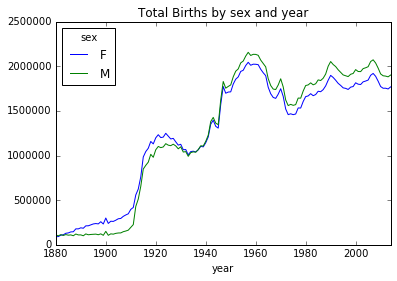

In [7]:
birthdate.plot(title='Total Births by sex and year')

### observe:
* the birth trends rise and fall based on economic trends- they births tend to fall in times of recession
* male births started to outpace female births after WWII.


## Adding Proportion and Subsetting Top 1000 Names

In [8]:
#find out what proportion of the baby population for each year is represented by each name.
def add_prop(group):
    # integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names2.groupby(['year','sex']).apply(add_prop)

names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [9]:
# subset top 1000 births

def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

top1000 = names.groupby(['year','sex']).apply(get_top1000)

top1000.head()


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [14]:
top1000[(top1000.name == 'Mary') & (top1000.sex == 'F')]

,,,name,sex,births,year,prop
year,sex,,,,,,
1880,F,0,Mary,F,7065,1880,0.077643
1881,F,2000,Mary,F,6919,1881,0.075244
1882,F,3935,Mary,F,8148,1882,0.075549
1883,F,6062,Mary,F,8012,1883,0.071331
1884,F,8146,Mary,F,9217,1884,0.071437
1885,F,10443,Mary,F,9128,1885,0.068603
1886,F,12737,Mary,F,9890,1886,0.068426
1887,F,15129,Mary,F,9888,1887,0.067734
1888,F,17502,Mary,F,11754,1888,0.065802


In [ ]:
type(top1000)

### Which spelling is more popular?

In [15]:
birthrate = names.pivot_table('births',index='year',columns='name',aggfunc=sum)
birthrate.head()

name,Aaban,Aabha,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,...,Zyshon,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyvion,Zyyanna,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
myNames = birthrate[['Holly','Hollie']]
myNames

name,Holly,Hollie
year,,
1880,5,6
1881,NaN,NaN
1882,NaN,5
1883,NaN,10
1884,NaN,NaN
1885,6,5
1886,NaN,13
1887,NaN,8
1888,8,15


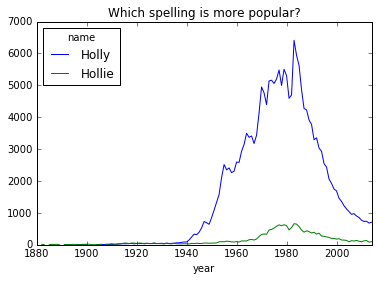

In [17]:
myNames.plot(title='Which spelling is more popular?')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F9501A828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023F95063898>], dtype=object)

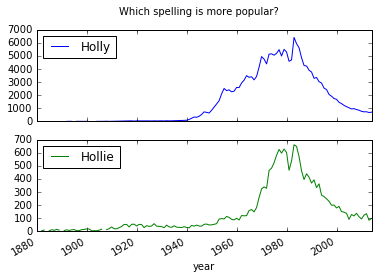

In [18]:
myNames.plot(subplots=True,title='Which spelling is more popular?')

### analyze naming trends

In [19]:
boys = top1000[top1000.sex == 'M']
boys.head(2)


name sex  births  year      prop
year sex                                         
1880 M   942     John   M    9655  1880  0.087383
         943  William   M    9532  1880  0.086269

In [20]:
girls = top1000[top1000.sex == 'F']
girls.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [21]:
total_births = pd.pivot_table(top1000, values='births', index=['year'],columns=['name'], aggfunc=np.sum)
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,...,11,42,NaN,NaN,23,7,30,42,45,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F94772C18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023F951C5550>], dtype=object)

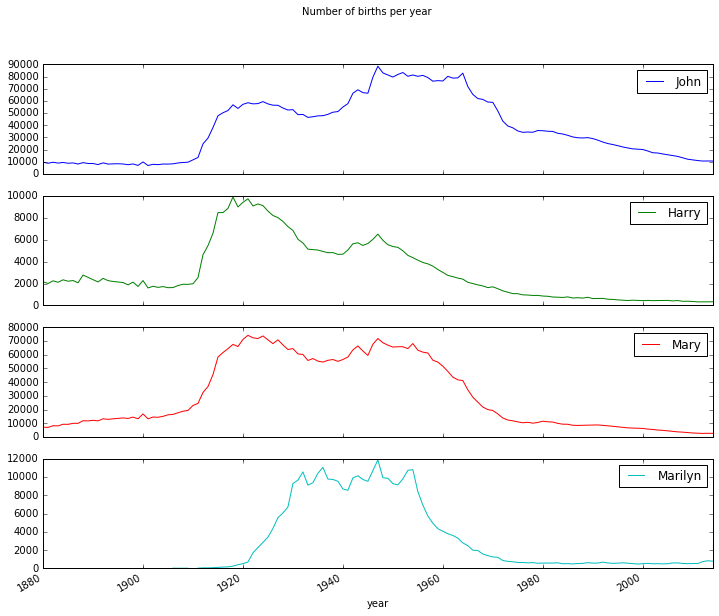

In [22]:
subset = total_births[['John','Harry','Mary','Marilyn']]

subset.plot(subplots=True, figsize=(12,10),grid=False,title='Number of births per year')

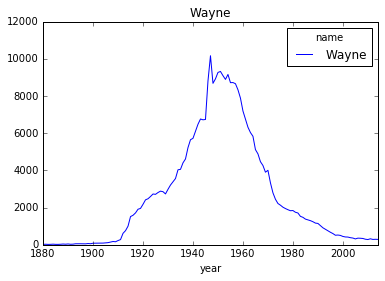

In [23]:
# plot 'Wayne'
    
subsetw = total_births[['Wayne']]
subsetw.plot(title='Wayne')

# names growing out of favor?

### Baby Name Diversity

In [25]:
# exploring increases in naming diversity
# fewer parents choosing common names for children

table = top1000.pivot_table(values='prop', index=['year'],columns=['sex'], aggfunc=np.sum)
table.head(10)

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


In [ ]:
table.plot(title='Sum of table1000.prop by year and sex'
           , yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

![alt text](pic1.png "Title")

* Note how proportion total starts at 1.0 in 1880
* slowly drops in 1960 for females and in 1970 for males
* The decline is 74% for females and 85% for males by 2010
* That means the share of births for other names outside of the top 1000 has risen. 
* More parents are choosing different, more uncommon names to call their newborns.

# More ...

In [ ]:
# names proportion going down from 1 from top 1000 names

df = boys[boys.year==2010]
df.head()

In [ ]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

prop_cumsum.head(10)  #prop_cumsum[:10]

In [ ]:
prop_cumsum.searchsorted(0.5)

prop_cumsum.head()

In [ ]:
df1900 = boys[boys.year==1900]
prop1900 = df1900.sort_index(by='prop', ascending=False).prop.cumsum()
prop1900.searchsorted(0.5)+1

# in 1900, top 50% of names covered with 25 names
# so there is a large increase in name diversity



In [ ]:
def get_quantile(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

diversity = top100.groupby(['year','sex']).apply(get_quantile)

diversity.head()


In [ ]:
diversity = diversity.unstack('sex')
diversity

In [ ]:
diversity.plot(title='Number of popular names in top 50%')


![alt text](pic2.png "Title")
* observe that 38 female names and 14 male names accounted for 50% of the top births in 1880. 

## More Analysis

* Male and Female Baby Name Last Letter Proportions

In [1]:
# use lambda function
get_last_letter = lambda x: x[-1]

names2['last_letter'] = names2.name.map(get_last_letter)
names2.head()

NameError: name 'names2' is not defined

In [ ]:
# create pivot table last_letters in rows

table = names2.pivot_table(values='births', index=['last_letter'], columns=['sex', 'year'], aggfunc=sum)
table.head()  


In [ ]:
# subset only certain years
   
subtable = table.reindex(columns=[1910,1960,2010], level='year')
subtable.head()


In [ ]:
#create proportion out of total in each year and sex

subtable.sum()


In [ ]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')

letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)


### Select Letters Throughout the Years

In [ ]:
# normalize by year and sex
# subset last letters of boy names

letter_prop = table/table.sum().astype(float)

dny_ts = letter_prop.ix[['d','n','y'],'M'].T

dny_ts.head()


In [ ]:
dny_ts.plot(title='Selected last letters of male baby names')
# last letter female names
lny_ts = letter_prop.ix[['l','n','y'],'F'].T
lny_ts.plot(title='Selected last letters of female baby names')

### Name Flipping

In [ ]:
# boy names that became girl names and reverse

all_names = top1000.name.unique()
all_names.shape

In [ ]:
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]

lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.tail()

In [ ]:
filtered.groupby('name').births.sum()


In [ ]:
table = filtered.pivot_table(values='births', index=['year'], columns=['sex'], aggfunc=sum)
table



In [ ]:
#table = table.div(table.sum(1), axis=0)
#table.tail(1000)


In [ ]:

table.plot(style={'M': 'k-', 'F': 'k--'})